## Redes Neurais
# Exercício 02
Redes Neurais Rasas

1 - Criação de bases binárias de diferentes tamanhos e distribuições

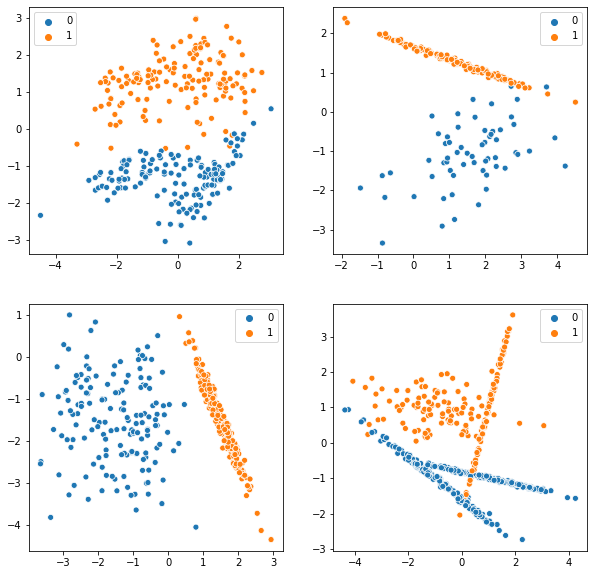

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


X1, y1 = make_classification(n_samples=300, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=2, class_sep=1.25,
                          flip_y=0,weights=[0.5,0.5])

X1_plot = pd.DataFrame(X1)
y1_plot = pd.Series(y1)

X2,y2 = make_classification(n_samples=200, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=1.25,
                          flip_y=0,weights=[0.3,0.7])

X2_plot = pd.DataFrame(X2)
y2_plot = pd.Series(y2)

X3,y3 = make_classification(n_samples=400, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=1.5,
                          flip_y=0,weights=[0.4,0.6])

X3_plot = pd.DataFrame(X3)
y3_plot = pd.Series(y3)

X4,y4 = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=2, class_sep=1,
                          flip_y=0,weights=[0.6,0.4])

X4_plot = pd.DataFrame(X4)
y4_plot = pd.Series(y4)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
sns.scatterplot(X1_plot.values[:,0],X1_plot.values[:,1],hue=y1_plot,ax=ax1);
sns.scatterplot(X2_plot.values[:,0],X2_plot.values[:,1],hue=y2_plot,ax=ax2);
sns.scatterplot(X3_plot.values[:,0],X3_plot.values[:,1],hue=y3_plot,ax=ax3);
sns.scatterplot(X4_plot.values[:,0],X4_plot.values[:,1],hue=y4_plot,ax=ax4);

plt.show();

2 - Criação de um "Performance Evaluator" e um "Experimenter" (conforme visto matérias anteriores)

In [0]:
from sklearn.model_selection import KFold
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import numpy as np

class PerformanceEvaluator():
  def __init__(self, X, y):
    X_sparse = coo_matrix(X)
    self.X, X_sparse, self.y = shuffle(X, X_sparse, y)
    self.kf = KFold(5)
  def folds(self, clf):
    folds = []
    for train_index, test_index in self.kf.split(self.X, self.y):      
      if (clf==tensor_adam) or (clf==tensor_sgd):
        clf.fit(self.X[train_index],self.y[train_index],verbose=0)
        labels, ids = np.unique(self.y[train_index], return_inverse=True)
        predictions = clf.predict(self.X[test_index])
        hits = labels[np.argmax(predictions,axis=1)]==self.y[test_index]
        folds.append(hits.mean())
      else:
        clf.fit(self.X[train_index],self.y[train_index])
        folds.append(clf.score(self.X[test_index],self.y[test_index]))
    return folds
  def score(self, clf):
    return np.mean(self.folds(clf))

class Experimenter():
  def __init__(self):
    self.datasets = []
    self.predictors = []
  def addDataset(self, dataset):
    self.datasets.append(dataset)
  def addPredictor(self, predictor):
    self.predictors.append(predictor)
  def perform(self):
    print('\t\t', end='| ')
    for predname, pred in self.predictors:
      print(predname, end='\t| ')
    print()
    for dsn, X, y in self.datasets:
      print(dsn , end='\t| ')
      pe = PerformanceEvaluator(X,y)
      for predname, pred in self.predictors:
        score = pe.score(pred)
        print('{0:.15f}'.format(score), end='\t| ')
      print()


3 - Definição de quais redes rasas serão testadas

3.1 - Perceptron gerado no exercício anterior

In [0]:
# Perceptron gerado no exercício anterior

from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np


class Custom_Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, learning_rate=0.1, epochs=100):
    self.lr = learning_rate # Taxa de aprendizado
    self.e = epochs # Épocas ou número de iterações
    self.activation = self.step # Função de ativação - Degrau
    self.w = None # Pesos
    self.b = None # Bias

  # Função de Ativação - Degrau
  def step(self, x): 
    return np.where(x>=0, 1, 0)

  def fit(self, X, y=None):
    # Número de amostras e de características do input
    q_samples, q_features = X.shape
    
    # Array zerada e com mesma quantidade de características do input
    self.w = np.zeros(q_features)
    # Bias
    self.b = 0

    # Iteração com número de épocas
    for __ in range(self.e):
      # Iteração pelos itens de X com o index(k) e a amostra
      for k, sample in enumerate(X):
        # Soma da multiplicação dos inputs pelos pesos mais o bias
        lin_output = np.dot(sample, self.w) + self.b
        # Cálculo da predição 
        y_pred = self.activation(lin_output)
        # Atualização usando a taxa de aprendizado
        update = self.lr * (y[k] - y_pred)
        # Atualização do peso
        self.w += update * sample
        # Atualização do bias
        self.b += update

  def predict(self, X, y=None):
    # Soma da multiplicação dos inputs pelos pesos mais o bias
    linear = np.dot(X, self.w) + self.b
    # Predição com aplicação da função de ativação
    y_pred = self.activation(linear)
    return y_pred

3.2 - Outras redes rasas utilizadas na comparação

In [0]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Perceptron desenvolvido
perceptron_custom = Custom_Perceptron()

# Perceptron do sklearn
perceptron_clf = Perceptron(tol=1e-3)

# SGD Classifier
SGD_clf = SGDClassifier(max_iter=1000, tol=1e-3)

# MLP Classifier
MLP_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1, 1))

# Tensor Flow - Adam Optmizer
tensor_adam = tf.keras.Sequential()
tensor_adam.add(tf.keras.layers.Dense(1))
tensor_adam.compile(optimizer='Adam', loss='mse')

# Tensor Flow - SGD Optmizer
tensor_sgd = tf.keras.Sequential()
tensor_sgd.add(tf.keras.layers.Dense(2))
tensor_sgd.compile(optimizer='sgd', loss='hinge')


4 - Comparação entre as redes escolhidas

In [11]:
exp = Experimenter()

exp.addPredictor(('sklearn perceptron', perceptron_clf))
exp.addPredictor(('custom perceptron', perceptron_custom))
exp.addPredictor(('SGD classifier', SGD_clf))

exp.addDataset(('Data 1\t', X1, y1))
exp.addDataset(('Data 2\t', X2, y2))
exp.addDataset(('Data 3\t', X3, y3))
exp.addDataset(('Data 4\t', X4, y4))

exp.perform()

		| sklearn perceptron	| custom perceptron	| SGD classifier	| 
Data 1		| 0.966666666666667	| 0.976666666666667	| 0.973333333333333	| 
Data 2		| 0.955000000000000	| 0.855000000000000	| 0.980000000000000	| 
Data 3		| 0.997500000000000	| 0.997500000000000	| 0.995000000000000	| 
Data 4		| 0.944000000000000	| 0.946000000000000	| 0.930000000000000	| 


In [12]:
exp = Experimenter()

exp.addPredictor(('MLP classifier', MLP_clf))
exp.addPredictor(('tensor - adam\t', tensor_adam))
exp.addPredictor(('tensor - sgd', tensor_sgd))

exp.addDataset(('Data 1\t', X1, y1))
exp.addDataset(('Data 2\t', X2, y2))
exp.addDataset(('Data 3\t', X3, y3))
exp.addDataset(('Data 4\t', X4, y4))

exp.perform()

		| MLP classifier	| tensor - adam		| tensor - sgd	| 
Data 1		| 0.653333333333333	| 0.500000000000000	| 0.886666666666667	| 
Data 2		| 0.935000000000000	| 0.300000000000000	| 0.880000000000000	| 
Data 3		| 0.762500000000000	| 0.400000000000000	| 0.460000000000000	| 
Data 4		| 0.600000000000000	| 0.600000000000000	| 0.874000000000000	| 
